In [1]:
# Install necessary libraries
!pip install scipy pandas seaborn matplotlib

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Step 1: Load the dataset
df = pd.read_csv('loan_data.csv')

# Step 2: Data Cleaning
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [4]:
# Fill missing values in ApplicantIncome (if necessary)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(), inplace=True)

In [5]:
# Filtering relevant columns (we'll use 'ApplicantIncome' and 'Property_Area')
df = df[['ApplicantIncome', 'Property_Area']]

In [6]:
# Check for any missing values again
print("Missing Values after cleaning:\n", df.isnull().sum())

Missing Values after cleaning:
 ApplicantIncome    0
Property_Area      0
dtype: int64


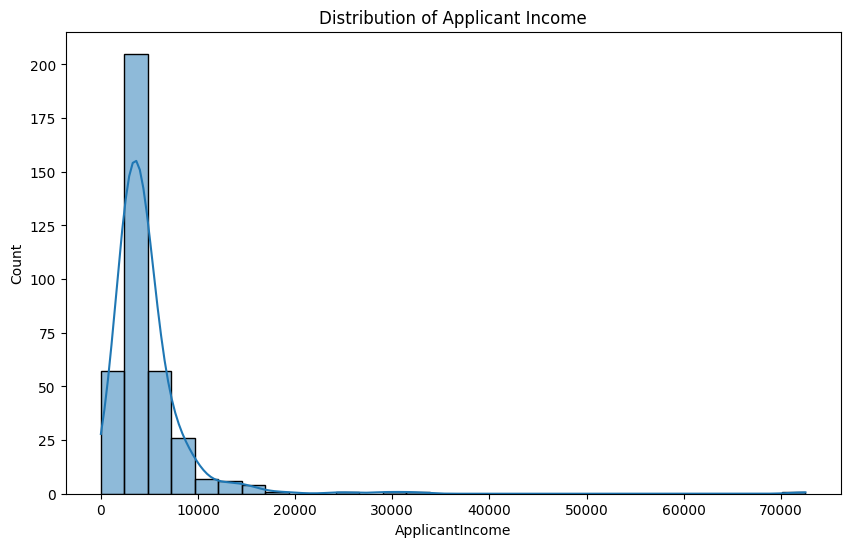

In [7]:
# Step 3: Exploratory Data Analysis (EDA)
# Distribution of Applicant Income
plt.figure(figsize=(10,6))
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title("Distribution of Applicant Income")
plt.show()

In [8]:
# Average Applicant Income by Property Area
area_mean_income = df.groupby('Property_Area')['ApplicantIncome'].mean()
print("Average Applicant Income by Property Area:\n", area_mean_income)

Average Applicant Income by Property Area:
 Property_Area
Rural        4573.936937
Semiurban    4745.689655
Urban        5038.914286
Name: ApplicantIncome, dtype: float64


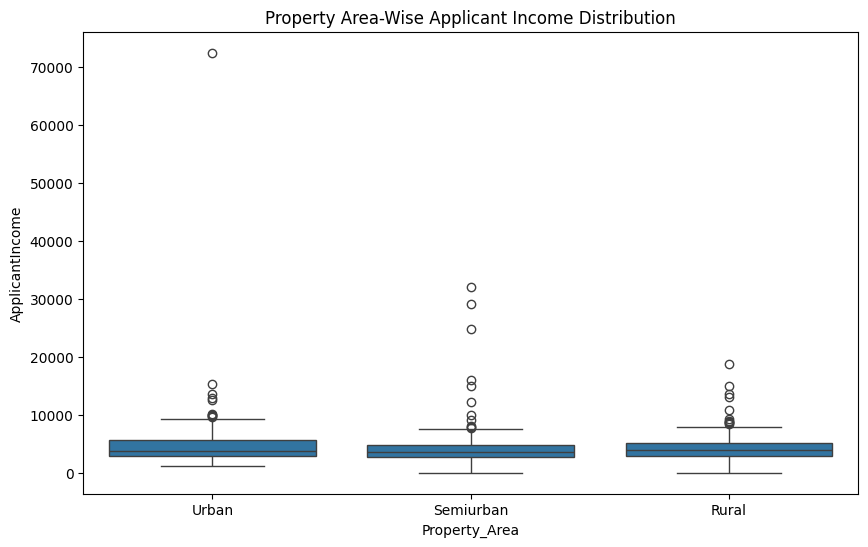

In [9]:
# Boxplot for Applicant Income by Property Area to visualize outliers
plt.figure(figsize=(10,6))
sns.boxplot(x='Property_Area', y='ApplicantIncome', data=df)
plt.title("Property Area-Wise Applicant Income Distribution")
plt.show()

In [10]:
# Step 4: Handle Outliers
# Removing outliers (ApplicantIncome greater than 99th percentile)
upper_bound = df['ApplicantIncome'].quantile(0.99)
df = df[df['ApplicantIncome'] <= upper_bound]

In [11]:
# Step 5: Hypothesis Setup
# Null Hypothesis (H0): The average applicant income for a property area is equal to the overall average.
# Alternate Hypothesis (H1): The average applicant income for a property area is significantly different from the overall average.

# Step 6: Z-Test for Urban Area
urban_data = df[df['Property_Area'] == 'Urban']['ApplicantIncome']
overall_mean = df['ApplicantIncome'].mean()
overall_std = df['ApplicantIncome'].std()

# Sample mean and standard deviation for Urban Area
urban_mean = urban_data.mean()
urban_std = urban_data.std()

# Number of samples in Urban Area
n_urban = len(urban_data)

# Z-Test for Urban Area
z_score_urban = (urban_mean - overall_mean) / (urban_std / np.sqrt(n_urban))
p_value_urban = stats.norm.sf(abs(z_score_urban)) * 2

print(f"Urban Area Z-Score: {z_score_urban}")
print(f"Urban Area P-Value: {p_value_urban}")

# Step 7: Z-Test for Rural Area (if applicable)
rural_data = df[df['Property_Area'] == 'Rural']['ApplicantIncome']

# Sample mean and standard deviation for Rural Area
rural_mean = rural_data.mean()
rural_std = rural_data.std()

# Number of samples in Rural Area
n_rural = len(rural_data)

# Z-Test for Rural Area
z_score_rural = (rural_mean - overall_mean) / (rural_std / np.sqrt(n_rural))
p_value_rural = stats.norm.sf(abs(z_score_rural)) * 2

print(f"Rural Area Z-Score: {z_score_rural}")
print(f"Rural Area P-Value: {p_value_rural}")

# Step 8: Conclusion
alpha = 0.05  # Significance level

if p_value_urban < alpha:
    print("Reject the null hypothesis for Urban Area: Applicant income is significantly different from the overall mean.")
else:
    print("Fail to reject the null hypothesis for Urban Area: Applicant income is not significantly different from the overall mean.")

if p_value_rural < alpha:
    print("Reject the null hypothesis for Rural Area: Applicant income is significantly different from the overall mean.")
else:
    print("Fail to reject the null hypothesis for Rural Area: Applicant income is not significantly different from the overall mean.")


Urban Area Z-Score: 0.6052418247044082
Urban Area P-Value: 0.545018329347184
Rural Area Z-Score: 0.5563169604440396
Rural Area P-Value: 0.5779941947298999
Fail to reject the null hypothesis for Urban Area: Applicant income is not significantly different from the overall mean.
Fail to reject the null hypothesis for Rural Area: Applicant income is not significantly different from the overall mean.


# Assignment Questions:

**Question 1**:

Based on the z-test results, if the Urban area has a significantly different p-value, what could this indicate about the urban applicants' incomes in comparison to other areas?

*Solution*: If the Urban area's p-value is less than 0.05, it means that the average applicant income in urban areas is significantly different from the overall average income. The bank could consider adjusting loan products or services to cater to the different income levels of urban applicants.

**Question 2**:

If both Urban and Rural areas have p-values greater than 0.05, what does this tell us about the consistency of applicant incomes across these regions?

*Solution*: If both Urban and Rural areas have p-values greater than 0.05, it indicates that applicant incomes across these areas are not significantly different from the overall average. This implies consistency in applicant incomes across different regions, and no major policy changes may be needed regarding income-based loan approvals.

